In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip

--2025-11-14 13:54:20--  https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip
Resolving bitbucket.org (bitbucket.org)... 13.200.41.134, 13.200.41.135, 13.200.41.136, ...
Connecting to bitbucket.org (bitbucket.org)|13.200.41.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105946856 (101M) [application/zip]
Saving to: ‘fruits.zip’

fruits.zip          100%[===================>] 101.04M  17.1MB/s    in 6.7s    

2025-11-14 13:54:29 (15.0 MB/s) - ‘fruits.zip’ saved [105946856/105946856]



In [3]:
!unzip fruits.zip

Archive:  fruits.zip
   creating: fruits/
  inflating: __MACOSX/._fruits       
  inflating: fruits/.DS_Store        
  inflating: __MACOSX/fruits/._.DS_Store  
   creating: fruits/test/
   creating: fruits/train/
   creating: fruits/validation/
   creating: fruits/test/apple/
  inflating: fruits/test/.DS_Store   
  inflating: __MACOSX/fruits/test/._.DS_Store  
   creating: fruits/test/banana/
   creating: fruits/test/orange/
   creating: fruits/train/apple/
  inflating: fruits/train/.DS_Store  
  inflating: __MACOSX/fruits/train/._.DS_Store  
   creating: fruits/train/banana/
   creating: fruits/train/orange/
   creating: fruits/validation/apple/
  inflating: fruits/validation/.DS_Store  
  inflating: __MACOSX/fruits/validation/._.DS_Store  
   creating: fruits/validation/banana/
   creating: fruits/validation/orange/
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflating: __MACOSX/fruits/test/apple/._Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflatin

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
tf.__version__

'2.19.0'

In [6]:
img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    'fruits/train',
    image_size=(img_height, img_width),
    batch_size=batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    'fruits/validation',
    image_size=(img_height, img_width),
    batch_size=batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    'fruits/test',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


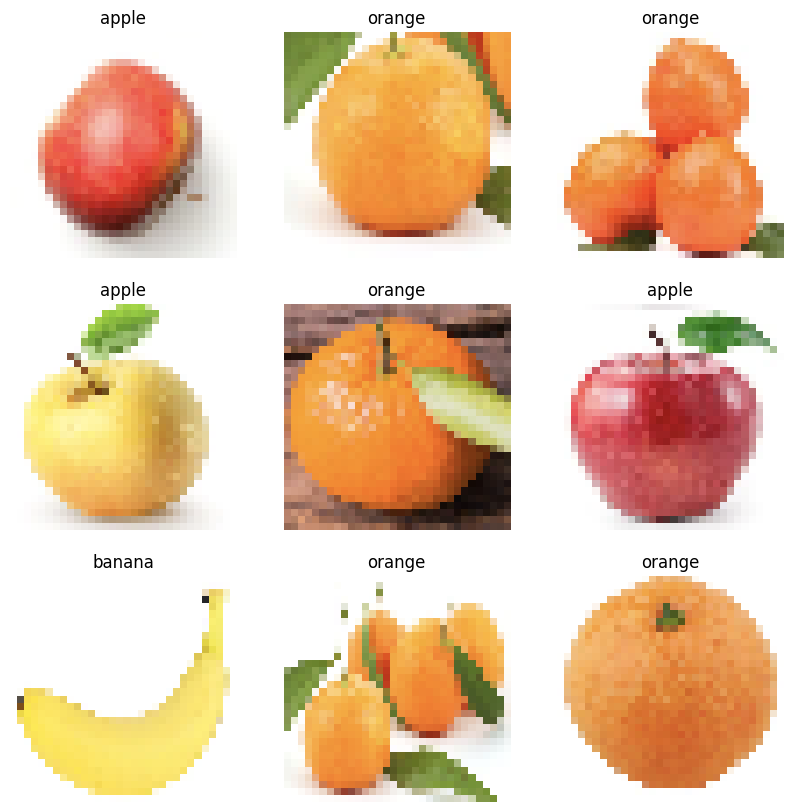

In [7]:
class_names = ["apple", "banana", "orange"]
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

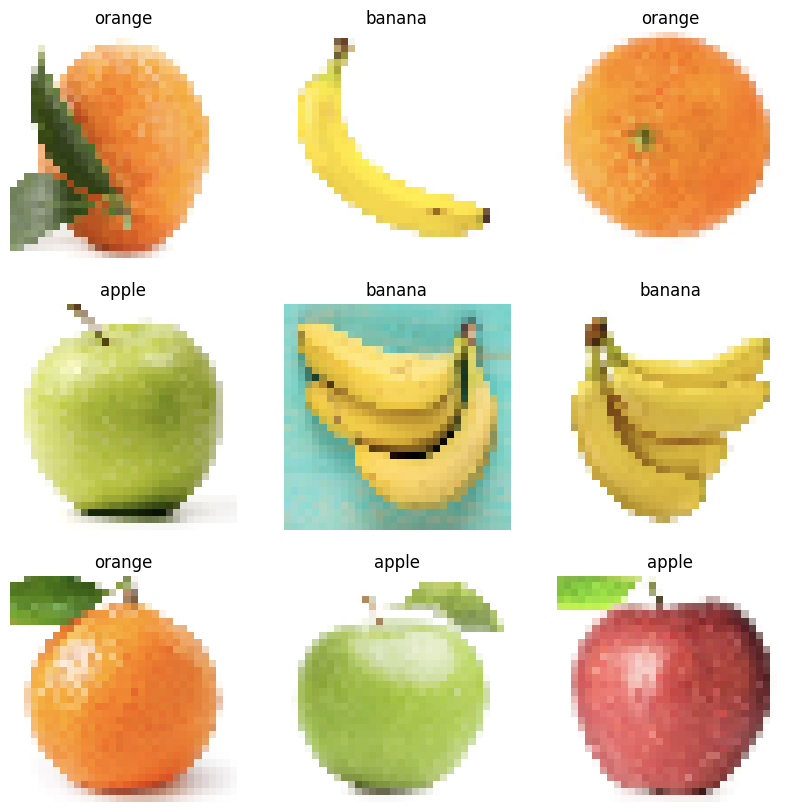

In [8]:
class_names = ["apple", "banana", "orange"]
plt.figure(figsize=(10,10))

for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [9]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(128, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(3)
    ]
)

In [10]:
model.compile(
    optimizer='rmsprop',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)



In [11]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)



Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - accuracy: 0.4542 - loss: 1.0431 - val_accuracy: 0.4545 - val_loss: 1.0500
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.6791 - loss: 0.6966 - val_accuracy: 0.7121 - val_loss: 0.4948
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.8005 - loss: 0.4993 - val_accuracy: 0.9394 - val_loss: 0.2768
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.9230 - loss: 0.2885 - val_accuracy: 0.8636 - val_loss: 0.2814
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9240 - loss: 0.2617 - val_accuracy: 0.9697 - val_loss: 0.1437
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.9337 - loss: 0.1880 - val_accuracy: 0.8333 - val_loss: 0.5511
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.9003 - loss: 0.2180 - val_accuracy: 0.8788 - val_loss: 0.2615
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.9561 - loss: 0.1460 - val_accuracy: 0.9697 -

In [12]:
model.evaluate(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9641 - loss: 0.0732


[0.09099283814430237, 0.9692307710647583]

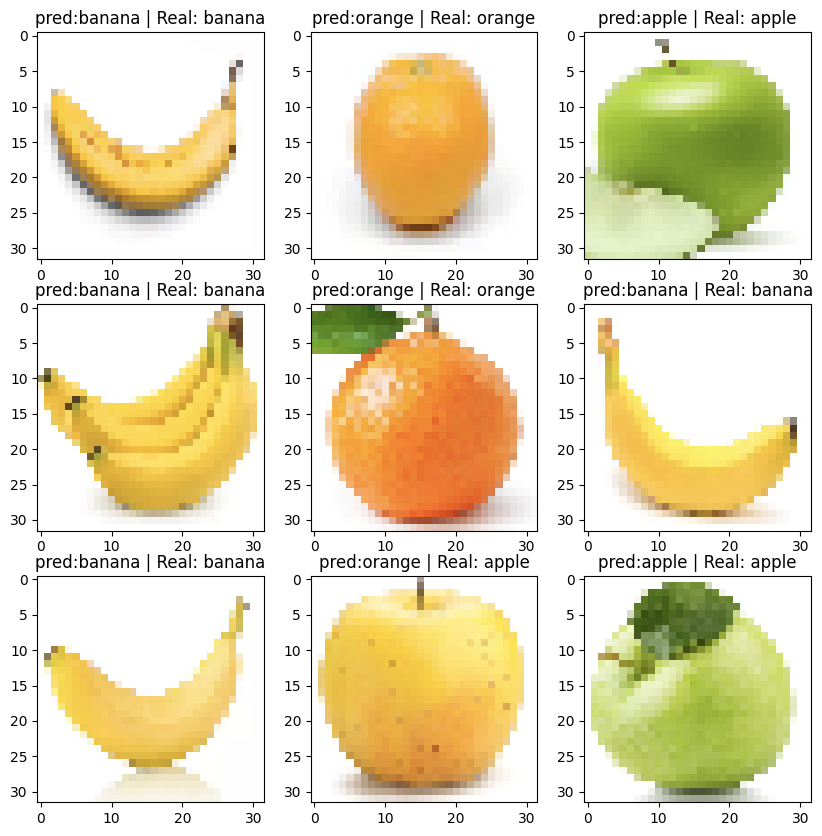

In [13]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)


  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("pred:"+class_names[index]+ " | Real: " + class_names[labels[i]])


In [14]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", "wb") as f:
  f.write(tflite_model)

Saved artifact at '/tmp/tmp4_x4wtgd'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  138479706930640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138479706930448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138479706930832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138479142505744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138479142505360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138479142506320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138479142505168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138479142507280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138479142506704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138479142508240: TensorSpec(shape=(), dtype=tf.resource, name=None)
